In [41]:
import cv2
import matplotlib.pyplot as plt
# LIBRERIAS
import matplotlib
import numpy as np

%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

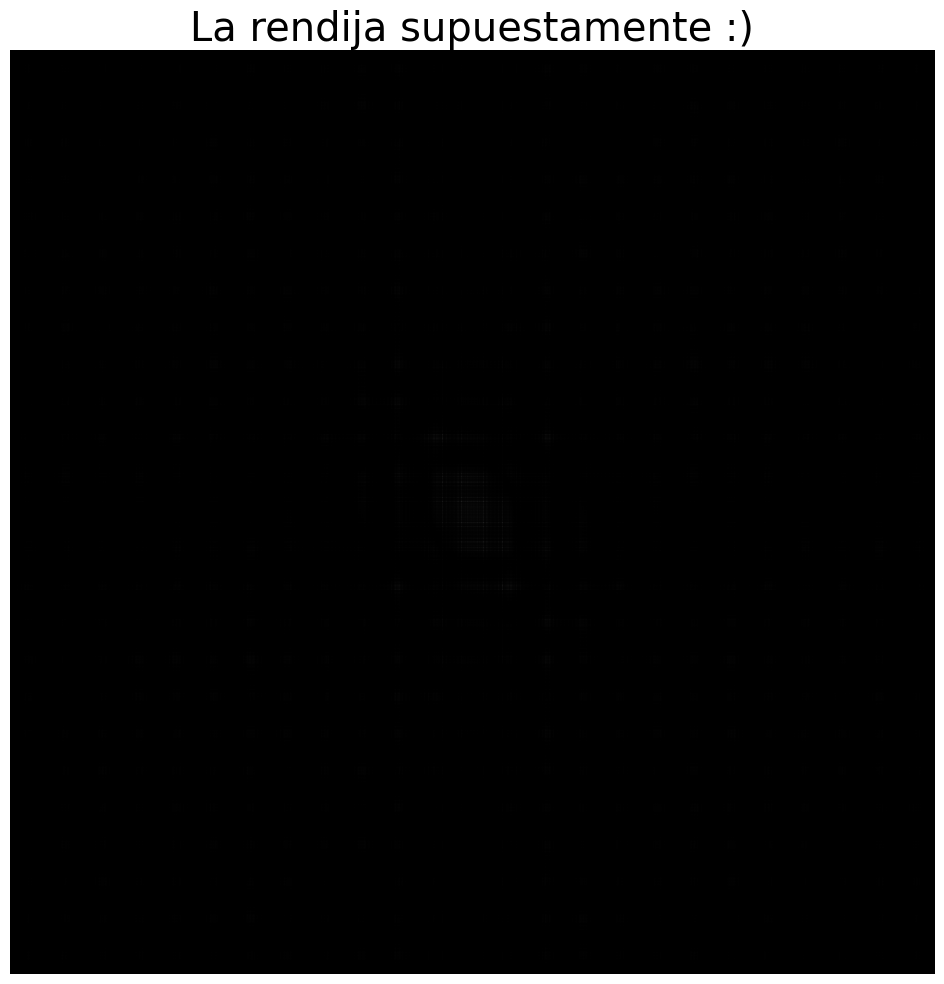

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def procesar_imagen_y_mostrar(filename, tamaño_cuadrado=3023):
    """
    Lee una imagen, la convierte en escala de grises, invierte los colores,
    aplica un umbral binario, la redimensiona a un tamaño cuadrado fijo y muestra la imagen resultante.

    Args:
        filename (str): El nombre del archivo de la imagen a procesar.
        tamaño_cuadrado (int): El tamaño al que se redimensionará la imagen para que sea cuadrada.

    Returns:
        numpy.ndarray: La imagen procesada en formato binario.
    """
    def imread_to_grayscale(filename):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    image = imread_to_grayscale(filename)
    image_invertida = 255 - image

    # Redimensionar la imagen a un tamaño cuadrado fijo
    image_cuadrada = cv2.resize(image_invertida, (tamaño_cuadrado, tamaño_cuadrado))

    # Aplicando umbral binario
    _, image_binaria = cv2.threshold(image_cuadrada, 150, 255, cv2.THRESH_BINARY)

    # Mostrando la imagen con Matplotlib
    # plt.imshow(image_binaria, cmap='gray')
    # plt.title('Imagen Binaria')
    # plt.axis('off')  # Ocultar los ejes
    # plt.show()

    return image_binaria

# Llamada a la función con el nombre del archivo
filename = 'foto_test_exp.jpg'
imagen_procesada = procesar_imagen_y_mostrar(filename)

# Parámetros
L = 0.5
N = 3023
dx = L / N
w = 0.051
lam = 0.5 * 1e-6
k = 2 * np.pi / lam
z = 2000

# Definir variables
fx = np.linspace(-1 / (2 * dx), 1 / (2 * dx), N)
FX, FY = np.meshgrid(fx, fx)
H = np.exp(-1j * np.pi * lam * z * (FX**2 + FY**2))

# Asegurarse de que H tenga la misma forma que imagen_procesada
H = H[:imagen_procesada.shape[0], :imagen_procesada.shape[1]]

# Transformada de Fourier
u1 = np.fft.fftshift(np.fft.fft2(imagen_procesada) / np.fft.fft2(H))

# Mostrando u1
plt.imshow(np.abs(u1), cmap='gray')
plt.title('La rendija supuestamente :)')
plt.axis('off')
plt.show()